In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## CHARGEMENT DES DONNÉES

In [27]:
df = pd.read_csv('../results_banking_problem.csv')

df.head()

,monnaie,nombreAnnees,prec
0,1.000000e+00,1,1
1,1.000000e+00,2,1
2,4.000000e+01,5,1
3,7.000000e+05,10,1
4,2.000000e+11,15,1


## SÉPARATION TRAIN / TEST

On fait le choix d'analyser le signe du resultat. On sait que l'experience amène soit une perte importante d'argent soit un gain important. Le problèmer est que les résultats de l'experience divergent fortement vers plus ou moins l'infini ce qui rend la création d'un arbre prédisant la valeur du résultat fastidieux. 

In [28]:
X = df[["nombreAnnees","prec"]]
df["signe_monnaie"] = df["monnaie"].apply(lambda x: "positif" if x>=1 else "negatif")
y = df["signe_monnaie"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



## TRAINING DU DECISION TREE

On utilise un arbre de classification pour classifier la perte ou le gain d'argent 

In [29]:
model = DecisionTreeClassifier(max_depth=3, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy : 0.7857142857142857
Confusion matrix:
 [[17  0]
 [ 6  5]]
              precision    recall  f1-score   support

     negatif       0.74      1.00      0.85        17
     positif       1.00      0.45      0.62        11

    accuracy                           0.79        28
   macro avg       0.87      0.73      0.74        28
weighted avg       0.84      0.79      0.76        28



## VISUALISATION DE L'ARBRE

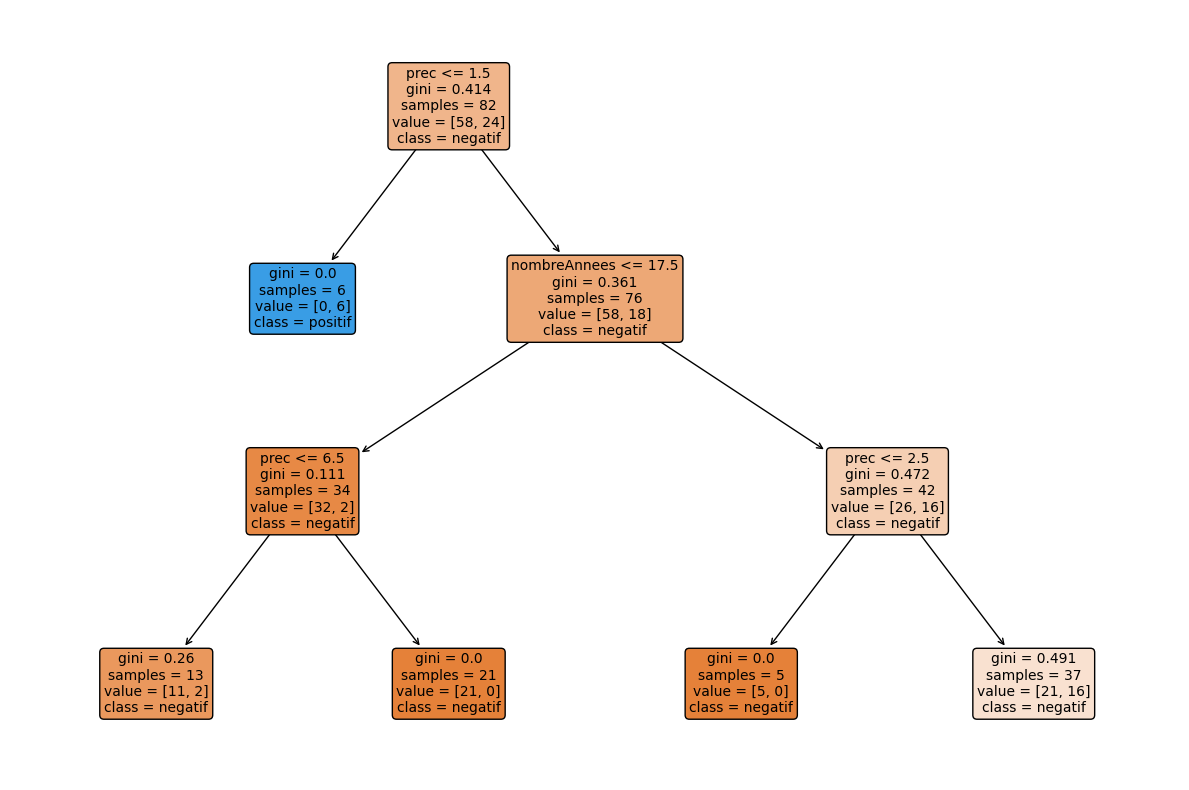

In [30]:
plt.figure(figsize=(12,8), dpi=100)
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(c) for c in model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()

## RÈGLES TEXTUELLES (interprétables)

In [31]:
rules = export_text(model, feature_names=list(X.columns))
print(rules)

|--- prec <= 1.50
|   |--- class: positif
|--- prec >  1.50
|   |--- nombreAnnees <= 17.50
|   |   |--- prec <= 6.50
|   |   |   |--- class: negatif
|   |   |--- prec >  6.50
|   |   |   |--- class: negatif
|   |--- nombreAnnees >  17.50
|   |   |--- prec <= 2.50
|   |   |   |--- class: negatif
|   |   |--- prec >  2.50
|   |   |   |--- class: negatif



Le verdict est clair. Ce qui influence les résultats (signe de ceux-ci) est la précision décimale de la valeur de e (monnaie de départ). Selon le modèle, si la valeur de e est précise à plus de deux décimales, le résultat de l'experience sera négatif (on perd de l'argent). C'est seulement dans le cas contraire que l'on peut gagner de l'argent. 

En ayant visualisé cela et en sachant que les résutats divergent vers plus ou moins l'infini on peut en conclure que le nombre d'années n'impacte pas réellement le contenu de l'experience mais seulement la valeur du resultat. Plus le nombre d'années sera important plus les résultats seront ou très élevé (si gain d'argent avec prec < 1.5) ou fortement négatif (prec > 1.5). 